# Basic Forecasting using HOLTWINTERS methods

#### 1.Reading and understanding data

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
df=pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


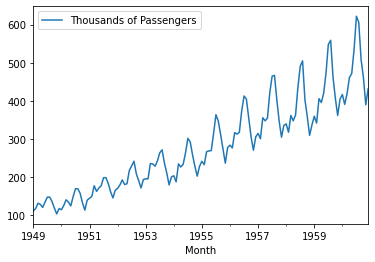

In [5]:
df.plot()

### 2. Splitting data into train-test datasets

In [6]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]
test_data.head()

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


#### 3. Choosing the model and fitting it on test dataset

In [9]:
#importing holtwinters model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
#fitting the test data
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
fitted_model

C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [11]:
#making test prediction
test_pred=fitted_model.forecast(36)
test_pred

1958-02-01    339.146252
1958-03-01    399.284474
1958-04-01    394.235196
1958-05-01    402.545303
1958-06-01    473.128007
1958-07-01    521.796520
1958-08-01    514.516182
1958-09-01    446.221344
1958-10-01    385.435189
1958-11-01    339.648129
1958-12-01    381.458569
1959-01-01    401.212425
1959-02-01    387.161260
1959-03-01    455.813618
1959-04-01    450.049483
1959-05-01    459.536102
1959-06-01    540.111631
1959-07-01    595.670443
1959-08-01    587.359382
1959-09-01    509.395627
1959-10-01    440.003604
1959-11-01    387.734191
1959-12-01    435.463990
1960-01-01    458.014521
1960-02-01    441.974046
1960-03-01    520.345937
1960-04-01    513.765738
1960-05-01    524.595436
1960-06-01    616.578535
1960-07-01    680.003148
1960-08-01    670.515440
1960-09-01    581.513880
1960-10-01    502.297604
1960-11-01    442.628090
1960-12-01    497.115288
1961-01-01    522.858436
Freq: MS, dtype: float64

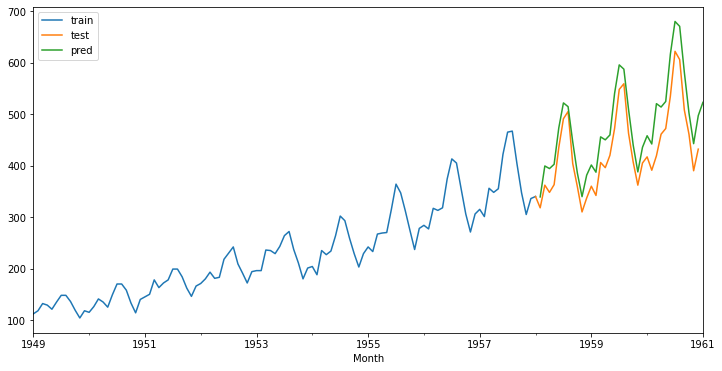

In [12]:
#comparing the actual test data and predicted data via plotting the graph
plt.figure(figsize=(12,6))
train_data['Thousands of Passengers'].plot(legend=True,label='train')
test_data['Thousands of Passengers'].plot(legend=True,label='test')
test_pred.plot(legend=True,label='pred')


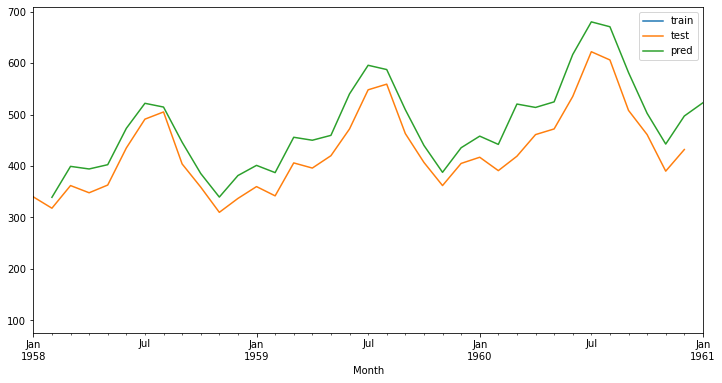

In [13]:
#visualising in depth
plt.figure(figsize=(12,6))
train_data['Thousands of Passengers'].plot(legend=True,label='train')
test_data['Thousands of Passengers'].plot(legend=True,label='test')
test_pred.plot(legend=True,label='pred',xlim=['1958-01-01','1961-01-01'])


Having a close look at the prediction-



#### 4. Evaluating the model 

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
#calculating mean absolute error
mean_absolute_error(test_data,test_pred)

63.030144414397256

In [27]:
#calculating mean squared error
np.sqrt(mean_squared_error(test_data,test_pred))

74.92732245789456

#### 5. Re-fitting the model on entire dataset  and now making future prediction

In [26]:
#re-fitting the model 
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit();

C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [20]:
#making future prediction
forecast_pred=final_model.forecast(36)
forecast_pred

1961-01-01    450.678701
1961-02-01    424.823259
1961-03-01    475.506378
1961-04-01    504.078728
1961-05-01    517.878313
1961-06-01    590.156455
1961-07-01    684.236578
1961-08-01    678.042247
1961-09-01    567.118995
1961-10-01    507.827864
1961-11-01    434.725056
1961-12-01    485.987531
1962-01-01    502.755926
1962-02-01    473.912814
1962-03-01    530.452513
1962-04-01    562.326480
1962-05-01    577.720648
1962-06-01    658.350738
1962-07-01    763.302090
1962-08-01    756.391986
1962-09-01    632.651232
1962-10-01    566.508840
1962-11-01    484.958792
1962-12-01    542.144794
1963-01-01    560.850825
1963-02-01    528.674808
1963-03-01    591.747832
1963-04-01    627.304929
1963-05-01    644.477937
1963-06-01    734.425066
1963-07-01    851.503851
1963-08-01    843.795264
1963-09-01    705.755909
1963-10-01    631.970572
1963-11-01    540.997180
1963-12-01    604.791190
Freq: MS, dtype: float64

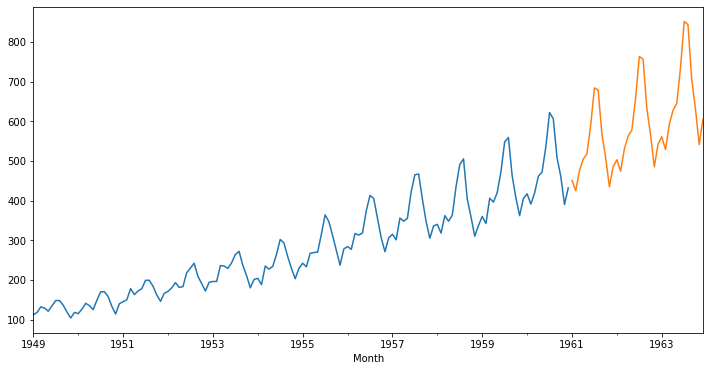

In [23]:
#future prediction for 3 years
df['Thousands of Passengers'].plot(figsize=(12,6))
forecast_pred.plot()

Thank you!

